<a href="https://colab.research.google.com/github/charlyhandsum/Data-Science/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Life Expectancy Prediction Using Regression Analysis**

---


# **Project Overview**

---


**Introduction**

Life expectancy is a key indicator of a nation's health and wellbeing, capturing both the effectiveness of healthcare systems and the socio-economic factors influencing a population's longevity. This project aims to predict life expectancy across various countries, which could serve as a valuable tool for policy-makers, healthcare providers, and researchers. Accurate predictions of life expectancy could help identify regions in need of health interventions, highlight areas for policy improvements, and track global health progress.

---

**Problem Statement**

The goal of this project is to develop a predictive model that estimates life expectancy based on various socio-economic, health, and environmental factors across countries. Specifically, we aim to answer: **What are the significant factors influencing life expectancy, and can we build a reliable model to predict it for a given country**?


---

# **Data Summary**

**Dataset Source**

Our dataset contains life expectancy-related information from multiple countries over several years, allowing for a comprehensive analysis of how various factors affect life expectancy.


---

# **Key Columns**

**Country**: Name of the country.

**Year**: Year of data collection.

**Life Expectancy**: Target variable, representing average life expectancy (years).

**Status**: Economic status of the country (Developed or Developing).

**Adult Mortality**: Rate of adult mortality per 1,000 people.

**Infant Deaths**: Number of infant deaths per 1,000 people.

**Alcohol**: Average alcohol consumption (liters per capita).

**BMI**: Average body mass index.

**Hepatitis B**: Immunization coverage (%) for hepatitis B.

**Measles**: Number of reported measles cases.

**Polio**: Immunization coverage (%) for polio.

**Total Expenditure**: Government health expenditure as a percentage of GDP.

**GDP**: Gross domestic product per capita.

**Schooling**: Average years of schooling.

**Other Indicators**: Including thinness levels, DPT immunization, and population.


---



# **Data Quality and Preprocessing**

In [1]:
# Preparing the data by handling missing values and potential outliers, which could negatively impact our model performance.

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Loading the data
Life_Expectancy = pd.read_csv('/content/sample_data/Life Expectancy Data.csv')

print(Life_Expectancy.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [2]:
Life_Expectancy.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [3]:
# Identifying Missing Values
missing_values = Life_Expectancy.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [4]:
# Imputing missing values with mean for numerical columns and most frequent for categorical
numerical_cols = Life_Expectancy.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = Life_Expectancy.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

original_columns = Life_Expectancy.columns.tolist()

Life_Expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Keeps other columns intact if needed
)

# Fit and transform
data_imputed = preprocessor.fit_transform(Life_Expectancy)

# Reconstruct the DataFrame
# OneHotEncoder creates additional columns for each category
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Concatenate column names using .tolist() for both to avoid shape issues
all_columns = numerical_cols.tolist() + categorical_feature_names.tolist()

Life_Expectancy_Complete = pd.DataFrame(data_imputed, columns=all_columns)

# Convert numerical columns back to proper types
Life_Expectancy_Complete[numerical_cols] = Life_Expectancy_Complete[numerical_cols].apply(pd.to_numeric)

# Display the resulting DataFrame
print(Life_Expectancy_Complete.head())

     Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015.0              65.0            263.0           62.0     0.01   
1  2014.0              59.9            271.0           64.0     0.01   
2  2013.0              59.9            268.0           66.0     0.01   
3  2012.0              59.5            272.0           69.0     0.01   
4  2011.0              59.2            275.0           71.0     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0    1154.0   19.1                83.0   
1               73.523582         62.0     492.0   18.6                86.0   
2               73.219243         64.0     430.0   18.1                89.0   
3               78.184215         67.0    2787.0   17.6                93.0   
4                7.097109         68.0    3013.0   17.2                97.0   

   ...  Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0  ...     

In [6]:
# Check for any remaining missing values
print("Remaining Missing Values:\n", Life_Expectancy_Complete.isnull().sum().sum())

Remaining Missing Values:
 0


In [7]:
Life_Expectancy_Complete.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Country', 'Status'],
      dtype='object')

# **Exploratory Data Analysis**

---



Statistical Summary:
               Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.507640       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.200000        74.000000       0.000000   
50%    2008.000000         72.000000       144.000000       3.000000   
75%    2012.000000         75.600000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000               

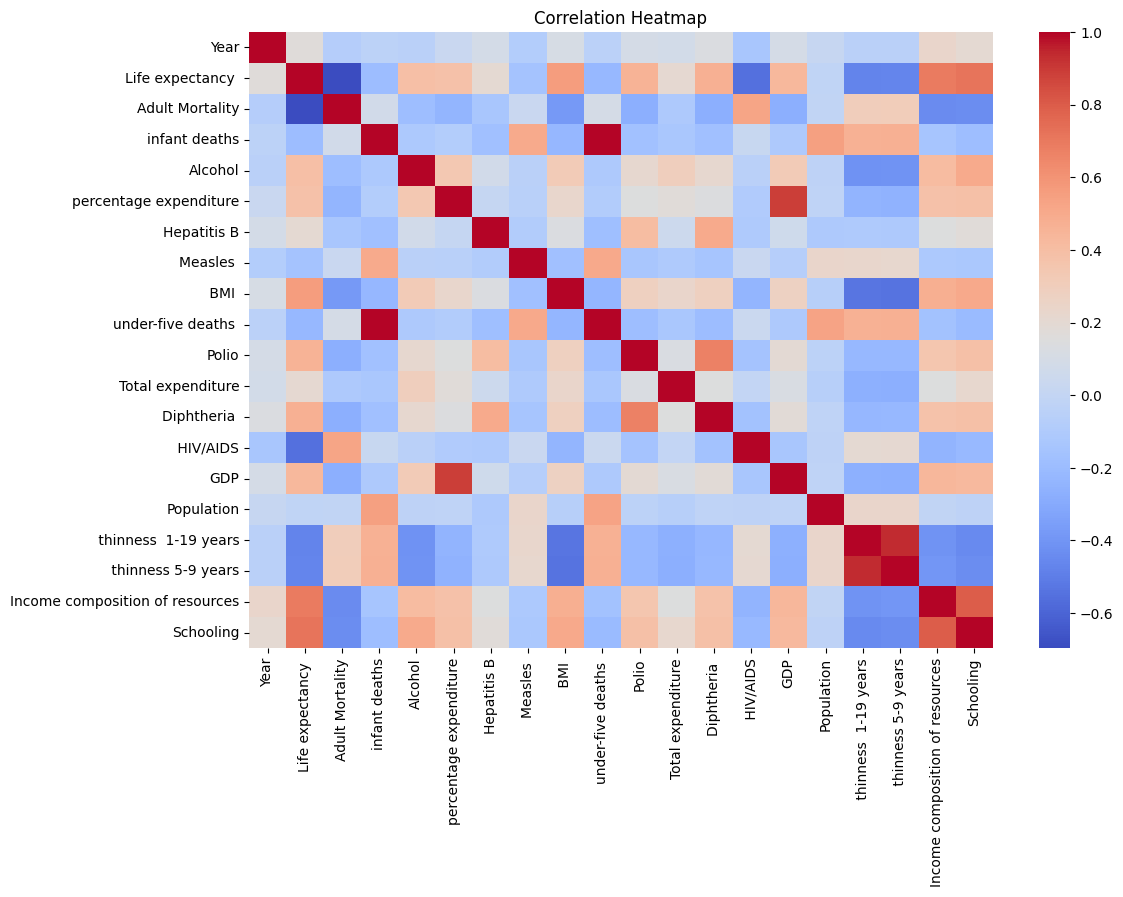

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Summary
print("Statistical Summary:\n", Life_Expectancy_Complete.describe())

# Selecting only numerical features for correlation
numerical_features = Life_Expectancy_Complete.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Selecting only numerical features for correlation
numerical_features = Life_Expectancy_Complete.select_dtypes(include=['number'])

# Calculate correlation on numerical features only
correlation_with_life_expectancy = numerical_features.corr()["Life expectancy "]

print(correlation_with_life_expectancy)

Year                               0.169623
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430493
Population                        -0.019638
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Name: Life expectancy , dtype: float64


**Conclusions from Heatmap**

The Variables that positively corelated with Life expectancy are:

**Schooling:** Education levels appear strongly associated with increased life expectancy.

**Income Composition of Resources:** Socio-economic indicators have a positive impact on life expectancy.

**GDP:** Wealthier countries tend to have higher life expectancies.

**BMI (Body Mass Index)**: shows a positive correlation with Life Expectancy. This indicates that as BMI increases (up to a healthy range), life expectancy tends to increase as well.

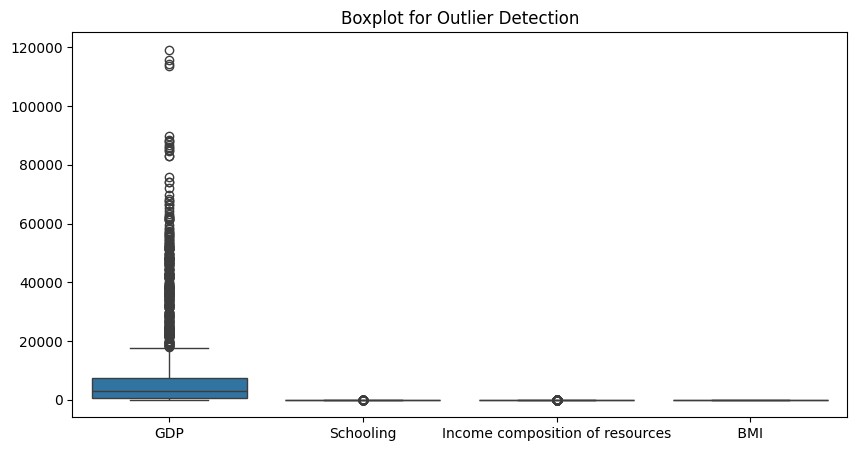

In [10]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=Life_Expectancy_Complete[['GDP', 'Schooling', 'Income composition of resources',' BMI ']])
plt.title("Boxplot for Outlier Detection")
plt.show()


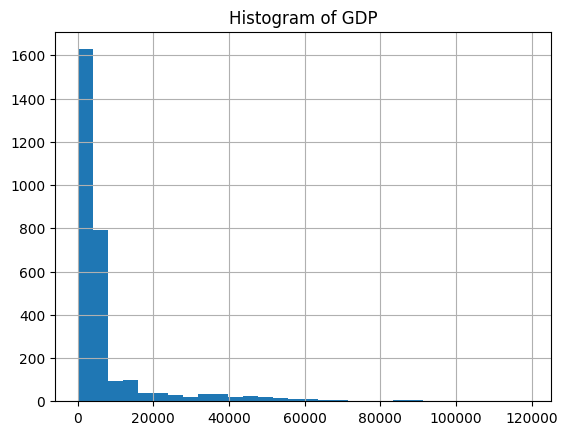

In [11]:
# Histograms and Scatter Plots
# Assuming 'data' is defined and has a 'GDP' column
Life_Expectancy_Complete['GDP'].hist(bins=30)
plt.title("Histogram of GDP")
plt.show()


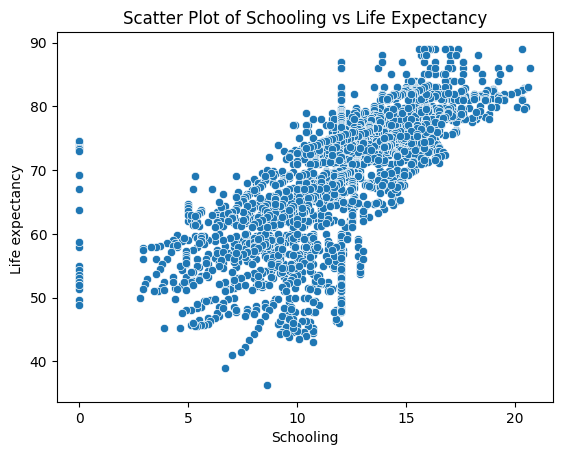

In [12]:
sns.scatterplot(x=Life_Expectancy_Complete['Schooling'], y=Life_Expectancy_Complete['Life expectancy '])
plt.title("Scatter Plot of Schooling vs Life Expectancy")
plt.show()

In [13]:
Life_Expectancy_Complete.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Country', 'Status'],
      dtype='object')

# **Model Selection and Methodology**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define dependent and independent variables
X = Life_Expectancy_Complete[['GDP', 'Schooling', 'Income composition of resources',' BMI ']]
y = Life_Expectancy_Complete['Life expectancy ']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Choice and Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print(model.coef_)
print(model.intercept_)

[7.20246626e-05 9.48283135e-01 1.35029782e+01 1.08484862e-01]
44.63842783699698


In [16]:
predictions = model.predict(X_test)
print(predictions)

[69.42519066 75.51381215 74.45874332 78.08409264 60.21869002 56.73825154
 63.36167656 67.26795193 74.49656344 62.99228172 57.34790463 68.06134739
 60.13561212 66.76430765 69.89243119 63.70420527 53.75034621 80.68765858
 69.69395991 82.25031736 81.07962225 85.33751026 69.09598499 69.63691969
 67.29893466 70.77987724 62.15624907 56.29422021 74.72965792 70.14008313
 64.62129005 71.83400658 61.73483782 66.85483856 79.98232766 56.01422178
 62.6585718  73.88264056 54.94440147 74.105417   60.99897638 64.77556473
 76.16319357 78.76679676 76.79647056 56.7324481  78.05806815 66.57614153
 59.06852112 63.66324401 67.04158969 61.30766684 78.63211702 68.08304436
 73.88478203 63.07976609 73.27408288 65.1528975  62.83269164 62.68567066
 72.08613576 61.16156783 73.60459801 66.68891983 55.67877321 70.56365089
 53.94443607 77.15681856 56.75061762 77.14153042 81.4302568  74.95142972
 73.80998406 63.92886896 61.34784673 70.18765068 63.86289664 76.15931028
 58.77695517 55.7528169  63.15615533 58.76067263 66

Text(0, 0.5, 'Actual Life Expectancy')

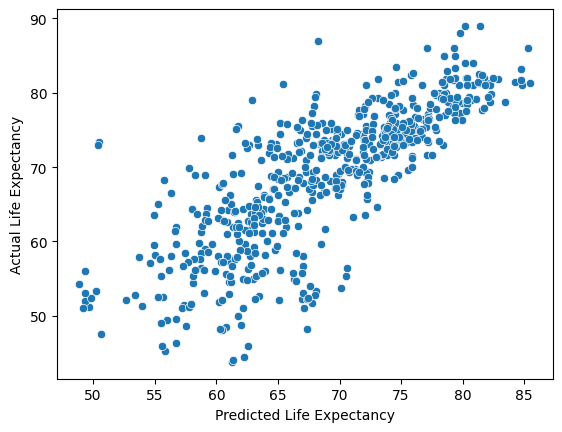

In [17]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Actual Life Expectancy")

# **Evaluating the Model**

In [18]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 4.116418813363972
Mean Squared Error (MSE): 32.406695717947784
R-squared (R2): 0.6259411076554776


In [23]:
Life_Expectancy_Complete.describe()['Life expectancy ']

,Life expectancy
count,2938.000000
mean,69.224932
std,9.507640
min,36.300000
25%,63.200000
50%,72.000000
75%,75.600000
max,89.000000


# **Predicting the Life Expectancy in Nigeria**


In [20]:
# Predict Life Expectancy for a specific country
country_data = Life_Expectancy_Complete[Life_Expectancy_Complete['Country'] == 'Nigeria']

# Select only the features used during training
# Assuming 'X' contains the original feature columns used for training
country_data_features = country_data[['GDP', 'Schooling', 'Income composition of resources',' BMI ']]

# Assuming you have a trained model named 'model' and you want to predict on the selected features
predicted_life_expectancy = model.predict(country_data_features)
print(f"Predicted Life Expectancy for Nigeria: {predicted_life_expectancy.mean():.2f} years")

Predicted Life Expectancy for Nigeria: 60.37 years


In [ ]:
print( )

# **Residual Analysis**
Analyzing residuals to check if errors are randomly distributed

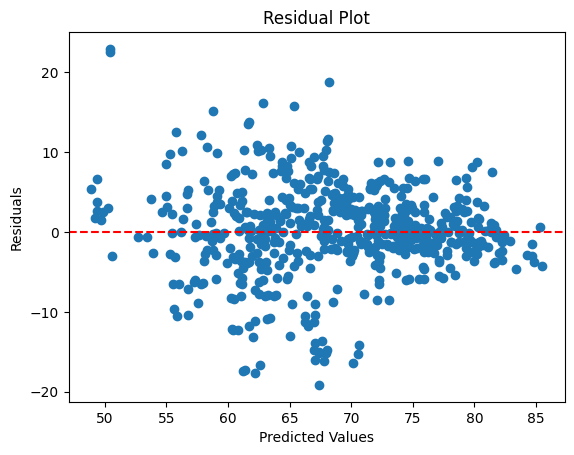

In [24]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

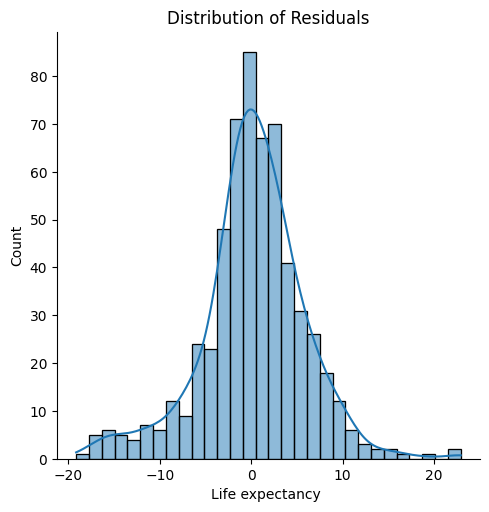

In [21]:
residuals = y_test - predictions
sns.displot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")

Residuals are randomly distributed around 0 indicating that the model captured some relationships in the data.

# **Comparing Baseline and Model Performance**

In [25]:
baseline = [y_test.mean()] * len(y_test)
baseline_mae = mean_absolute_error(y_test, baseline)
print("Baseline MAE:", baseline_mae)


Baseline MAE: 7.681453420509873


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model MAE:", mae)
print("Model MSE:", mse)
print("Model R²:", r2)

# Compare with baseline
print("Baseline MAE:", baseline_mae)  # Replace 7 with your baseline metric

Model MAE: 4.116418813363972
Model MSE: 32.406695717947784
Model R²: 0.6259411076554776
Baseline MAE: 7.681453420509873


MAE: Our model’s MAE is lower than 7. This indicates the model predicts better than simply guessing the average value.

MSE: Our model’s MSE is lower than the baseline's squared error.

R² Score: Our R² score (0.6) reflects a good model performance.

# **Cross-Validation**

Using k-fold cross-validation to assess how well the model generalizes

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='r2', cv=5)  # Using R² as a metric
print("Cross-Validation R² Scores:", scores)
print("Average R² Score:", scores.mean())

Cross-Validation R² Scores: [0.57499795 0.6874361  0.57811757 0.63057849 0.47631386]
Average R² Score: 0.5894887943123822


An average R² score of 0.59 means that our model explains 59% of the variance in the target variable (Life Expectancy).


# **Checking for Overfitting/Underfitting**

In [31]:
y_train_pred = model.predict(X_train)
print("Training RMSE:", mean_squared_error(y_train, y_train_pred, squared=False)) # Use mean_squared_error with squared=False
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False)) # Use mean_squared_error with squared=False

Training RMSE: 6.081143708293776
Test RMSE: 5.692687916788324


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Feature Importance**

Identifying which features contribute the most to predictions:

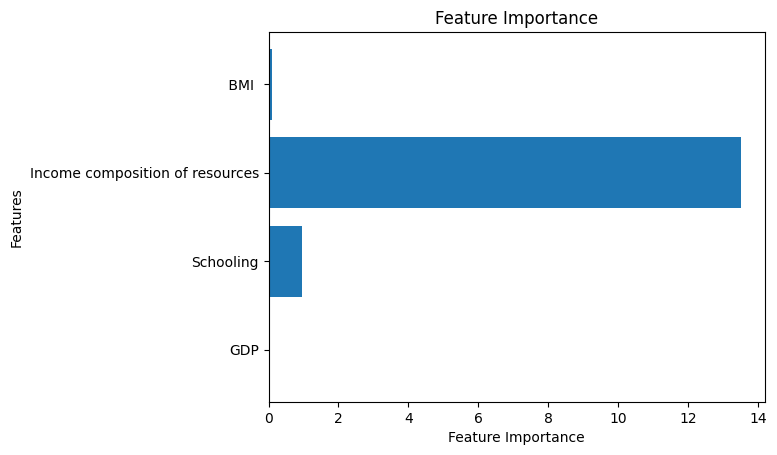

In [32]:
import matplotlib.pyplot as plt
importance = model.coef_  # For linear models
plt.barh(X_train.columns, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

# **Saving my Trained Model**

In [35]:
import joblib

# Save the model
joblib.dump(model, 'life_expectancy_model.pkl')

['life_expectancy_model.pkl']